### Network Intrusion Detection System¶
### Binomail classification: Activity is normal or DOS or PROBE or R2L or U2R

We will Classify Data into Binomial & Multinomial data . This sheet will cover Binomial Classification

Method Description

Step 1: Data preprocessing: All features are made numerical using one-Hot-encoding. The features are scaled to avoid features with large values that may weigh too much in the results.

Step 2: Feature Selection: Eliminate redundant and irrelevant data by selecting a subset of relevant features that fully represents the given problem. Univariate feature selection with RFE & Seleck K Best . This analyzes each feature individually to detemine the strength of the relationship between the feature and labels. Using Weight of Evidence & VIF method to select features based on highest scores.

Step 4: Build the model: Decision tree model is built.

Step 5: Prediction & Evaluation (validation): Using the combined Test and Train data to make predictions of the model. Multiple scores are considered such as:accuracy score, recall, f-measure, confusion matrix using XGBoost,Adaptive Boosting ,Random Forest & Logistic Regression Models

### Importing Packages for building classification models using Machine Learning

In [1]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
#from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


<Figure size 432x216 with 0 Axes>

In [2]:
#Load Test and Train data

# attach the column names to the dataset
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

# KDDTrain+_2.csv & KDDTest+_2.csv are the datafiles without the last column about the difficulty score
# these have already been removed.
Train_Data = pd.read_csv("H:/Machine Learning/6. Machine Learning- Final Projects Submission/1. Supervised Learning(Regression,Classification,Forecasting)/3. Network Intrusion Detection System/NSL_Dataset/Train_Data.csv", header=None, names = col_names)
Test_Data = pd.read_csv("H:/Machine Learning/6. Machine Learning- Final Projects Submission/1. Supervised Learning(Regression,Classification,Forecasting)/3. Network Intrusion Detection System/NSL_Dataset/Test_Data.csv", header=None, names = col_names)

# shape, this gives the dimensions of the dataset
print('Dimensions of the Training set:',Train_Data.shape)
print('Dimensions of the Test set:',Test_Data.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


### Data Audit

In [4]:
Train_Data.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate    label  
0                      0.00   normal  
1                      0.00   normal  
2                      0.00  neptune  
3                      0.01   normal  
4                      0.00   normal  

[5 rows x 42 columns]

In [5]:
Test_Data.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  10   
1               0       0    0  ...                   1   
2               0       0    0  ...                  86   
3               0       0    0  ...                  57   
4               0       0    0  ...                  86   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   
3                    1.00                    0.00   
4                    0.31                    0.17   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   
3                         1.00                         0.28   
4                         0.03                         0.02   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  1.00   
1                   0.0                       0.0                  1.00   
2                   0.0                       0.0                  0.00   
3                   0.0                       0.0                  0.00   
4                   0.0                       0.0                  0.83   

   dst_host_srv_rerror_rate    label  
0                      1.00  neptune  
1                      1.00  neptune  
2                      0.00   normal  
3                      0.00    saint  
4                      0.71    mscan  

[5 rows x 42 columns]

In [6]:
Train_Data.describe()

duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_count  \
count  125973.000000    125973.000000  ...   125973.000000   
mean        0.395736         0.279250  ...      182.148945   
std         0.489010        23.942042  ...       99.206213   
min         0.000000         0.000000  ...        0.000000   
25%         0.000000         0.000000  ...       82.000000   
50%         0.000000         0.000000  ...      255.000000   
75%         1.000000         0.000000  ...      255.000000   
max         1.000000      7479.000000  ...      255.000000   

       dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count       125973.000000           125973.000000           125973.000000   
mean           115.653005                0.521242                0.082951   
std            110.702741                0.448949                0.188922   
min              0.000000                0.000000                0.000000   
25%             10.000000                0.050000                0.000000   
50%             63.000000                0.510000                0.020000   
75%            255.000000                1.000000                0.070000   
max            255.000000                1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125973.000000                125973.000000   
mean                      0.148379                     0.032542   
std                       0.308997                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125973.000000             125973.000000         125973.000000   
mean               0.284452                  0.278485              0.118832   
std                0.444784                  0.445669              0.306557   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count             125973.000000  
mean                   0.120240  
std                    0.319459  
min                    0.000000  
25%       

In [7]:
Test_Data.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  22544.000000  2.254400e+04  2.254400e+04  22544.000000    22544.000000   
mean     218.859076  1.039545e+04  2.056019e+03      0.000311        0.008428   
std     1407.176612  4.727864e+05  2.121930e+04      0.017619        0.142599   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  5.400000e+01  4.600000e+01      0.000000        0.000000   
75%        0.000000  2.870000e+02  6.010000e+02      0.000000        0.000000   
max    57715.000000  6.282565e+07  1.345927e+06      1.000000        3.000000   

             urgent           hot  num_failed_logins     logged_in  \
count  22544.000000  22544.000000       22544.000000  22544.000000   
mean       0.000710      0.105394           0.021647      0.442202   
std        0.036473      0.928428           0.150328      0.496659   
min        0.000000      0.000000           0.000000      0.000000   
25%        0.000000      0.000000           0.000000      0.000000   
50%        0.000000      0.000000           0.000000      0.000000   
75%        0.000000      0.000000           0.000000      1.000000   
max        3.000000    101.000000           4.000000      1.000000   

       num_compromised  ...  dst_host_count  dst_host_srv_count  \
count     22544.000000  ...    22544.000000        22544.000000   
mean          0.119899  ...      193.869411          140.750532   
std           7.269597  ...       94.035663          111.783972   
min           0.000000  ...        0.000000            0.000000   
25%           0.000000  ...      121.000000           15.000000   
50%           0.000000  ...      255.000000          168.000000   
75%           0.000000  ...      255.000000          255.000000   
max         796.000000  ...      255.000000          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count            22544.000000            22544.000000   
mean                 0.608722                0.090540   
std                  0.435688                0.220717   
min                  0.000000                0.000000   
25%                  0.070000                0.000000   
50%                  0.920000                0.010000   
75%                  1.000000                0.060000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                 22544.000000                 22544.000000   
mean                      0.132261                     0.019638   
std                       0.306268                     0.085394   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.030000                     0.010000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count          22544.000000              22544.000000          22544.000000   
mean               0.097814                  0.099426              0.233385   
std                0.273139                  0.281866              0.387229   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                0.000000                  0.000000              0.360000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count              22544.000000  
mean                   0.226683  
std                    0.400875  
min                    0.000000  
25%                    0.000000  
50%         

In [8]:
#Checking Missing Values for Train and Test Data

print(sum(Train_Data.isnull().sum()))
print(sum(Test_Data.isnull().sum()))

0
0


####  Label Distribution of Training and Test set

In [9]:
print('Label distribution Training set:')
print(Train_Data.label.value_counts())

Label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64


In [10]:
print('Label distribution Test set:')
print(Test_Data.label.value_counts())

Label distribution Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
sqlattack             2
perl                  2
phf                   2
udpstorm              2
imap                  1
Name: label, dtype: int64


#### Above Observation conculde that we have more types of Attacks in Test Data than Train Data

In [11]:
#Train Data Profile Report

profile_report = pandas_profiling.ProfileReport(Train_Data)
profile_report

In [12]:
#Test Data Profile Report

profile_report = pandas_profiling.ProfileReport(Test_Data)
profile_report

In [13]:
Train_Data['target'] = Train_Data['label'].apply(lambda x: 0 if x == 'normal' else 1)
Test_Data['target'] = Test_Data['label'].apply(lambda x: 0 if x == 'normal' else 1)

In [14]:
Train_data = Train_Data['target'].value_counts()
lab = ['normal','attack']
Train_data

0    67343
1    58630
Name: target, dtype: int64

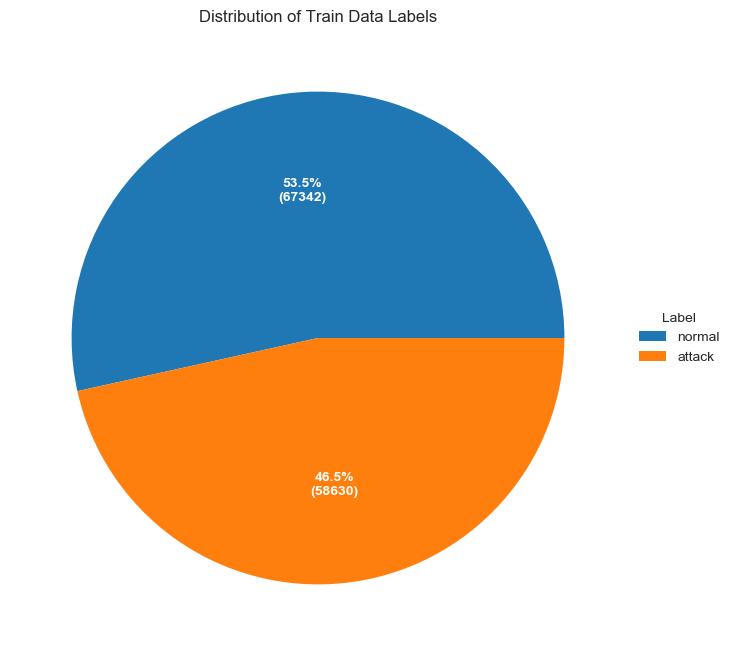

In [16]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

## Plotting the Train Data
wedges, texts, autotexts = ax.pie(Train_data, autopct=lambda pct: func(pct, Train_data),
                                  textprops=dict(color="w"))
ax.legend(wedges, lab,
          title="Label",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribution of Train Data Labels")

plt.show()

In [19]:
Test_data = Test_Data['target'].value_counts()
lab = ['normal','attack']
Test_data

1    12833
0     9711
Name: target, dtype: int64

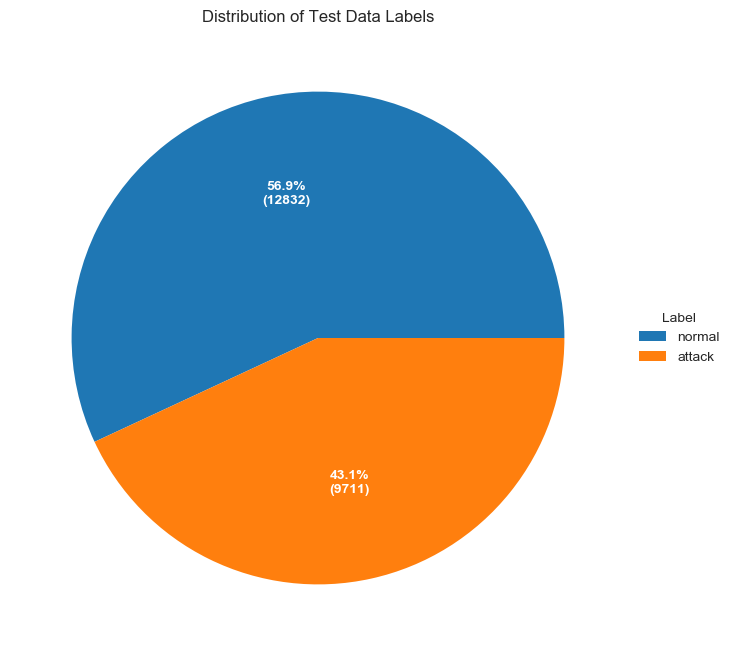

In [20]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

## Plotting the Train Data
wedges, texts, autotexts = ax.pie(Test_data, autopct=lambda pct: func(pct, Test_data),
                                  textprops=dict(color="w"))
ax.legend(wedges, lab,
          title="Label",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribution of Test Data Labels")

plt.show()

### Distribution of the 4 classes of attacks

In [21]:
#Train data

DOS = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','upstorm','worm']
Probe = ['ipsweep','nmap','mscan','portsweep','saint','satan']
U2R = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']
R2L = ['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','Snmpgetattack','spy','snmpguess','warzclient','warzmaster','xlock','xsnoop']
count = {'DOS':0, 'Probe':0, 'U2R':0, 'R2L':0}

for attack in Train_Data['label']:
    if attack in DOS:
        count['DOS'] += 1
    elif attack in Probe:
        count['Probe'] += 1
    elif attack in U2R:
        count['U2R'] += 1
    elif attack in R2L:
        count['R2L'] += 1
count

{'DOS': 45927, 'Probe': 11656, 'U2R': 52, 'R2L': 85}

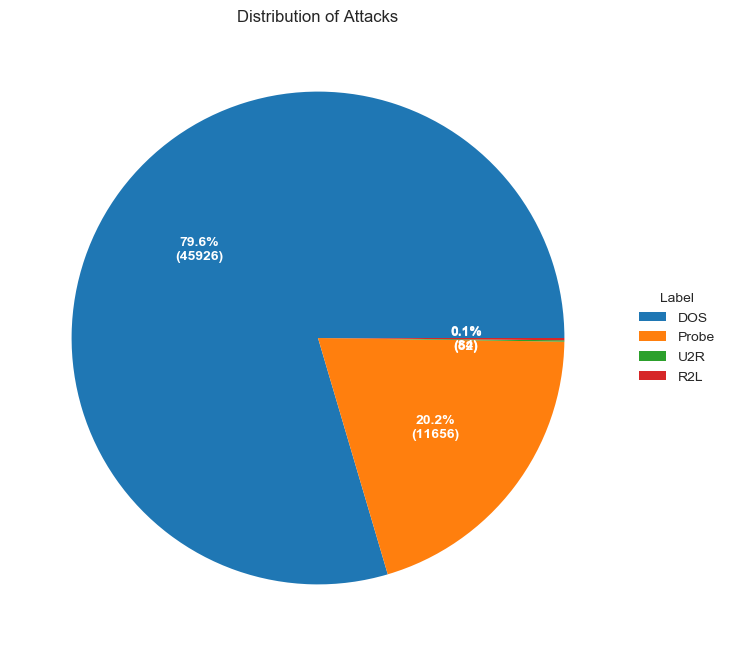

In [22]:
# Distribution in Train Data

Train_data = list(count.values())
lab = list(count.keys())
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(Train_data, autopct=lambda pct: func(pct, Train_data),
                                  textprops=dict(color="w"))
ax.legend(wedges, lab,
          title="Label",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribution of Attacks")

plt.show()

In [23]:
#Test data

DOS = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','upstorm','worm']
Probe = ['ipsweep','nmap','mscan','portsweep','saint','satan']
U2R = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']
R2L = ['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','Snmpgetattack','spy','snmpguess','warzclient','warzmaster','xlock','xsnoop']
count = {'DOS':0, 'Probe':0, 'U2R':0, 'R2L':0}

for attack in Test_Data['label']:
    if attack in DOS:
        count['DOS'] += 1
    elif attack in Probe:
        count['Probe'] += 1
    elif attack in U2R:
        count['U2R'] += 1
    elif attack in R2L:
        count['R2L'] += 1
count

{'DOS': 7458, 'Probe': 2421, 'U2R': 67, 'R2L': 1763}

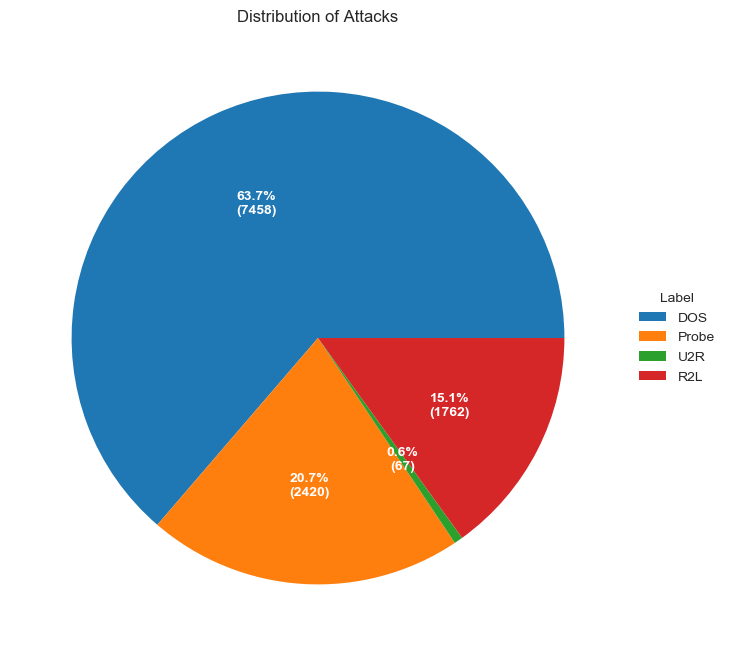

In [24]:
# Distribution in Train Data

Test_data = list(count.values())
lab = list(count.keys())
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(Test_data, autopct=lambda pct: func(pct, Test_data),
                                  textprops=dict(color="w"))
ax.legend(wedges, lab,
          title="Label",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Distribution of Attacks")

plt.show()

In [25]:
Train_data

[45927, 11656, 52, 85]

In [26]:
Test_data

[7458, 2421, 67, 1763]

In [27]:
# Dropping Labels columns since we have converted it into Target Value4

Train_Data = Train_Data.drop(columns=['label'])
Test_Data = Test_Data.drop(columns=['label'])

In [28]:
## Applying LabelEncoder to convert Text Data intto Numerical
categorical = [1,2,3]

encoder = LabelEncoder()
for col in categorical:
    Train_Data.iloc[:,col] = pd.Series(encoder.fit_transform(Train_Data.iloc[:,col]))
    Test_Data.iloc[:,col] = pd.Series(encoder.transform(Test_Data.iloc[:,col]))

<b>Test set contains types of attacks which are not in the train set. Every attack has a different kind of signature. 
The model can learn the signature of a type of an attack and can thus detect it in future. But for those attacks 
whose signatures are not known might not always be detected by the model. To avoid such an issue, 
the two sets are combined and hence we got a final Data containing all type of Attact details</b>

In [29]:
data_final = pd.concat([Train_Data,Test_Data],axis=0)

In [30]:
data_final.land

0        0
1        0
2        0
3        0
4        0
        ..
22539    0
22540    0
22541    0
22542    0
22543    0
Name: land, Length: 148517, dtype: int64

## Data Preparation

### Exploratory Analysis - On Final and Prepared Data

In [31]:
# Distribution of Y
data_final.target.value_counts()

0    77054
1    71463
Name: target, dtype: int64

In [32]:
data_final.target.value_counts()/data_final.target.count()

0    0.518823
1    0.481177
Name: target, dtype: float64

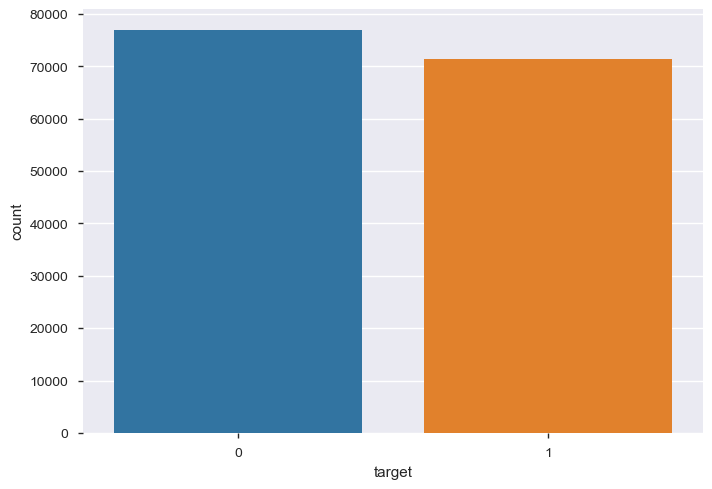

In [33]:
sns.countplot(x="target", data=data_final)
plt.show()

In [34]:
data_final.groupby('target').mean()

duration  protocol_type    service      flag     src_bytes  \
target                                                                 
0       153.272536       1.166221  27.021660  8.646339  11797.028538   
1       409.948785       0.936639  36.800568  5.149896  70883.199824   

           dst_bytes      land  wrong_fragment   urgent       hot  ...  \
target                                                             ...   
0        4308.945895  0.000091        0.001635  0.00013  0.208062  ...   
1       30868.613856  0.000350        0.040888  0.00028  0.169234  ...   

        dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  \
target                                                               
0            148.49198          193.651893                0.822599   
1            222.13649           39.469138                0.223904   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
target                                                        
0                     0.038372                     0.121717   
1                     0.133412                     0.172041   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
target                                                      
0                          0.025013              0.012679   
1                          0.036590              0.518610   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
target                                                   
0                       0.005615              0.042744   
1                       0.516216              0.237010   

        dst_host_srv_rerror_rate  
target                            
0                       0.040184  
1                       0.240138  

[2 rows x 41 columns]

##### Observations:
Dropping columns as per Profile Report which are highly correlated
[num_compromised,srv_serror_rate,srv_rerror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate]

In [35]:
data_final.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target'],
      dtype='object')

In [36]:
## Dropping columns based on Profile Report

data_final = data_final.drop(columns=['num_compromised','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_srv_rerror_rate'])

In [37]:
# Creating Data audit Report

def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_data =data_final.apply(lambda x: var_summary(x)).T

In [38]:
num_data.T

duration  protocol_type       service          flag     src_bytes  \
N       1.485170e+05  148517.000000  1.485170e+05  1.485170e+05  1.485170e+05   
NMISS   0.000000e+00       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
SUM     4.110643e+07  156797.000000  4.712006e+06  1.034262e+06  5.974534e+09   
MEAN    2.767793e+02       1.055751  3.172705e+01  6.963930e+00  4.022795e+04   
MEDIAN  0.000000e+00       1.000000  2.400000e+01  9.000000e+00  4.400000e+01   
STD     2.460683e+03       0.422304  1.629149e+01  2.774951e+00  5.409612e+06   
VAR     6.054961e+06       0.178340  2.654128e+02  7.700354e+00  2.926390e+13   
MIN     0.000000e+00       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
P1      0.000000e+00       0.000000  4.000000e+00  1.000000e+00  0.000000e+00   
P5      0.000000e+00       0.000000  1.200000e+01  1.000000e+00  0.000000e+00   
P10     0.000000e+00       1.000000  1.200000e+01  1.000000e+00  0.000000e+00   
P25     0.000000e+00       1.000000  2.000000e+01  5.000000e+00  0.000000e+00   
P50     0.000000e+00       1.000000  2.400000e+01  9.000000e+00  4.400000e+01   
P75     0.000000e+00       1.000000  4.900000e+01  9.000000e+00  2.780000e+02   
P90     0.000000e+00       2.000000  5.400000e+01  9.000000e+00  8.840000e+02   
P95     9.000000e+00       2.000000  6.000000e+01  9.000000e+00  1.594200e+03   
P99     8.172000e+03       2.000000  6.700000e+01  9.000000e+00  5.454000e+04   
MAX     5.771500e+04       2.000000  6.900000e+01  1.000000e+01  1.379964e+09   

           dst_bytes           land  wrong_fragment         urgent  \
N       1.485170e+05  148517.000000   148517.000000  148517.000000   
NMISS   0.000000e+00       0.000000        0.000000       0.000000   
SUM     2.537985e+09      32.000000     3048.000000      30.000000   
MEAN    1.708885e+04       0.000215        0.020523       0.000202   
MEDIAN  0.000000e+00       0.000000        0.000000       0.000000   
STD     3.703525e+06       0.014677        0.240069       0.019417   
VAR     1.371610e+13       0.000215        0.057633       0.000377   
MIN     0.000000e+00       0.000000        0.000000       0.000000   
P1      0.000000e+00       0.000000        0.000000       0.000000   
P5      0.000000e+00       0.000000        0.000000       0.000000   
P10     0.000000e+00       0.000000        0.000000       0.000000   
P25     0.000000e+00       0.000000        0.000000       0.000000   
P50     0.000000e+00       0.000000        0.000000       0.000000   
P75     5.710000e+02       0.000000        0.000000       0.000000   
P90     3.437400e+03       0.000000        0.000000       0.000000   
P95     8.314000e+03       0.000000        0.000000       0.000000   
P99     2.559816e+04       0.000000        0.000000       0.000000   
MAX     1.309937e+09       1.000000        3.000000       3.000000   

                  hot  ...  srv_diff_host_rate  dst_host_count  \
N       148517.000000  ...       148517.000000    1.485170e+05   
NMISS        0.000000  ...            0.000000    0.000000e+00   
SUM      28126.000000  ...        14471.700000    2.731644e+07   
MEAN         0.189379  ...            0.097441    1.839280e+02   
MEDIAN       0.000000  ...            0.000000    2.550000e+02   
STD          2.013160  ...            0.258886    9.852833e+01   
VAR          4.052813  ...            0.067022    9.707831e+03   
MIN          0.000000  ...            0.000000    0.000000e+00   
P1           0.000000  ...            0.000000    1.000000e+00   
P5           0.000000  ...            0.000000    3.000000e+00   
P10          0.000000  ...            0.000000    1.200000e+01   
P25          0.000000  ...            0.000000    8.700000e+01   
P50          0.000000  ...            0.000000    2.550000e+02   
P75          0.000000  ...            0.000000    2.550000e+02   
P90          0.000000  ...            0.330000    2.550000e+02   
P95          0.000000  ...            1.000000    2.550000e+02   
P99          2.0000

In [39]:
data_final.num_root

0        0
1        0
2        0
3        0
4        0
        ..
22539    0
22540    0
22541    0
22542    0
22543    0
Name: num_root, Length: 148517, dtype: int64

In [40]:
data_final.is_guest_login

0        0
1        0
2        0
3        0
4        0
        ..
22539    0
22540    0
22541    0
22542    0
22543    0
Name: is_guest_login, Length: 148517, dtype: int64

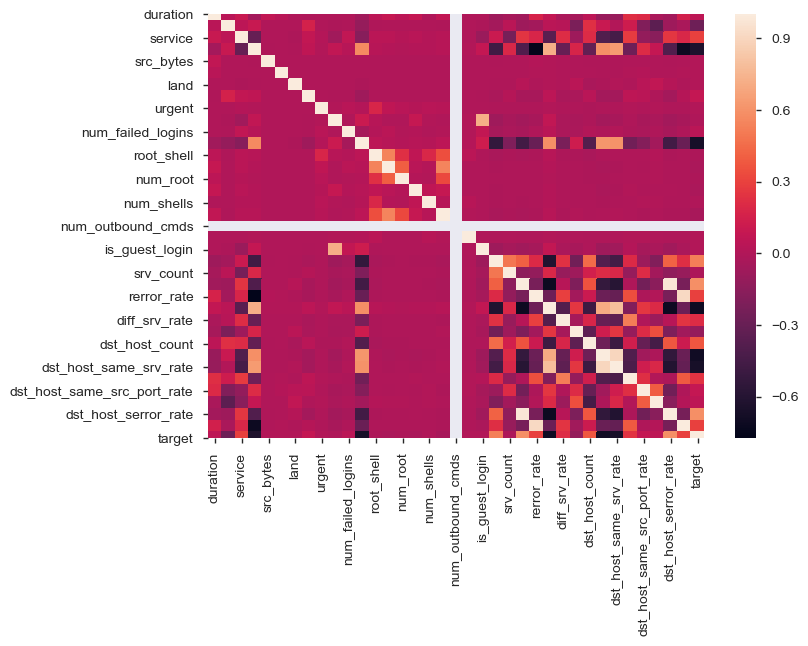

In [41]:
### visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_final.corr())

In [43]:
corr_data = data_final.corr()
corr_data.to_csv('corr_data.csv')

#### As per Corr Matrix and heatmap we will reduce below Varaibles with derminant as 0
num_outbound_cmds


In [44]:
data_final = data_final.drop(columns=['num_outbound_cmds'])

### variable reduction (feature selection/reduction)

- Univariate Regression
- WOE - Binomial classification
- RFE
- SelectKBest
- VIF
- PCA

#### Univariate Regression

In [45]:
somersd_df = pd.DataFrame()
for num_variable in data_final.columns.difference(['target']):
    result = smf.logit(formula = str('target ~ ')+str(num_variable), data=data_final).fit()
    somers_d = 2*metrics.roc_auc_score(data_final.target, result.predict()) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['VariableName', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.516230
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.664631
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.692429
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.618243
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.656695
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.643208
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689113
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.446227
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.479450
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.418808
  

In [46]:
imp_vars_SD = somersd_df.sort_values('SomersD', ascending=False).head(15)

In [47]:
imp_vars_SD

VariableName   SomersD
0      dst_host_srv_count  0.760173
0  dst_host_same_srv_rate  0.711397
0           same_srv_rate  0.696737
0                    flag  0.686483
0               logged_in  0.651907
0  dst_host_diff_srv_rate  0.647118
0           diff_srv_rate  0.646419
0                   count   0.56518
0    dst_host_serror_rate  0.558452
0             serror_rate  0.544387
0          dst_host_count  0.408476
0      srv_diff_host_rate  0.269461
0                 service  0.260557
0    dst_host_rerror_rate  0.242973
0             rerror_rate   0.21764

In [48]:
imp_vars_somerceD = list(imp_vars_SD.VariableName.values)

#### RFE

In [49]:
X = data_final[data_final.columns.difference(['target'])]
classifier = RandomForestClassifier()
rfe = RFE(classifier, 15)
rfe = rfe.fit(X, data_final[['target']] )

In [50]:
imp_vars_RFE = list(X.columns[rfe.support_])

In [51]:
imp_vars_RFE

['count',
 'dst_bytes',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'flag',
 'hot',
 'logged_in',
 'protocol_type',
 'service',
 'src_bytes',
 'srv_count']

#### Select KBEST

In [52]:
X = data_final[data_final.columns.difference(['target'])]
SKB = SelectKBest(f_classif, k=15).fit(X, data_final[['target']] )

In [53]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

In [54]:
imp_vars_SKB

['count',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'flag',
 'logged_in',
 'protocol_type',
 'rerror_rate',
 'same_srv_rate',
 'serror_rate',
 'service']

#### Final List (from Univariate, RFE, SelectKbest)

In [55]:
Final_list = list(set(imp_vars_SKB + imp_vars_somerceD + imp_vars_RFE))

In [56]:
Final_list

['src_bytes',
 'dst_host_same_srv_rate',
 'count',
 'flag',
 'protocol_type',
 'dst_host_srv_diff_host_rate',
 'serror_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'srv_count',
 'dst_host_rerror_rate',
 'diff_srv_rate',
 'dst_bytes',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'logged_in',
 'rerror_rate',
 'hot',
 'dst_host_serror_rate',
 'service',
 'srv_diff_host_rate']

In [57]:
X = data_final[Final_list]

#### Using WOE (Weight of Evidence)
- Identify important variables using WOE or log(odds) comparing with Y
- Variable Transformation: (i) Bucketing if the variables are not having linear relationship with log(odds)

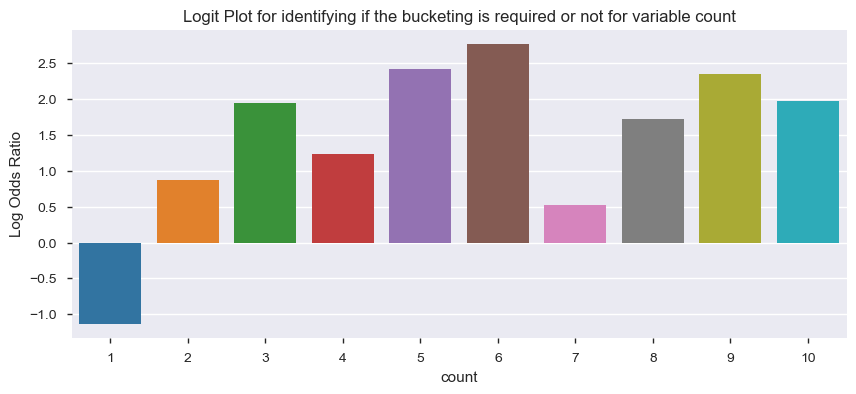

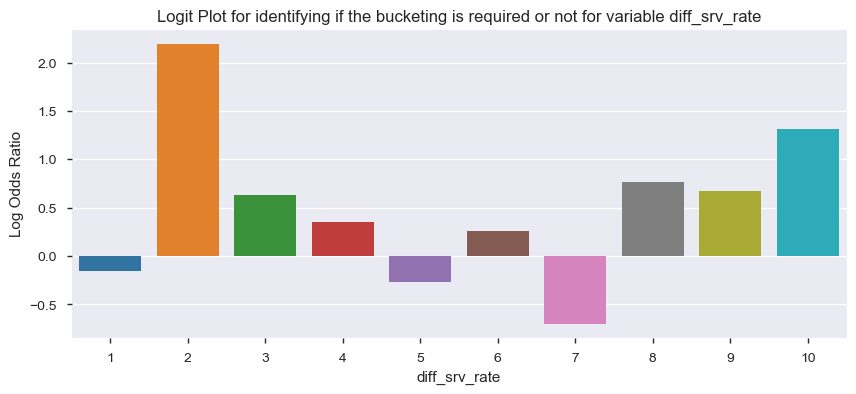

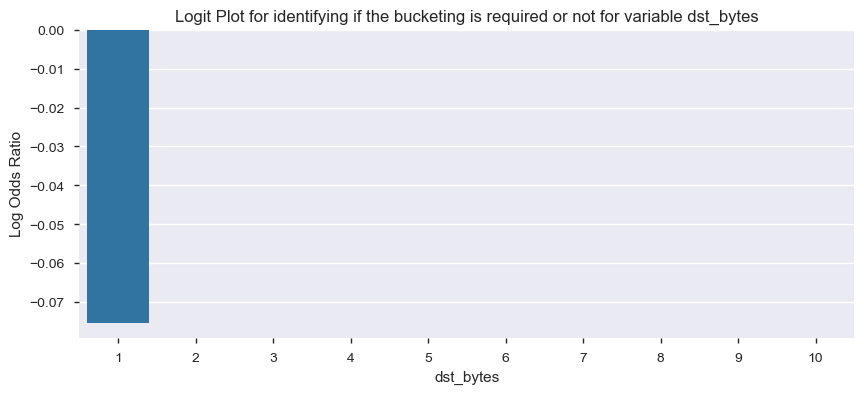

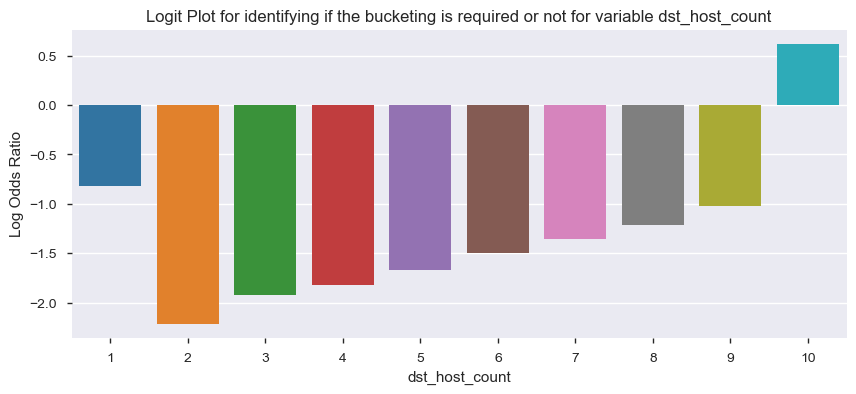

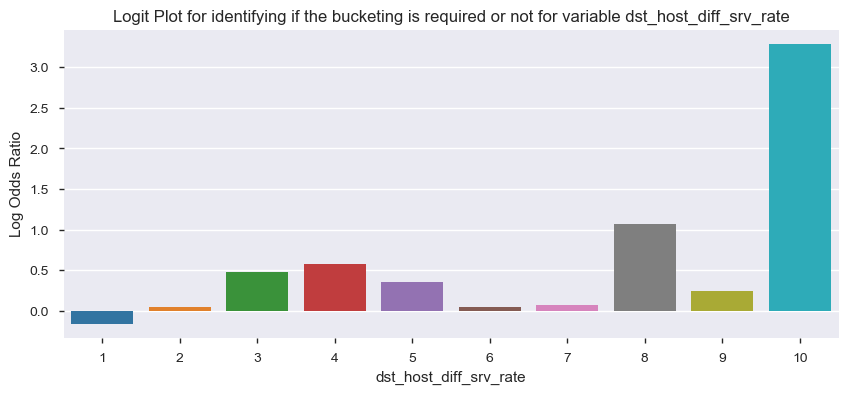

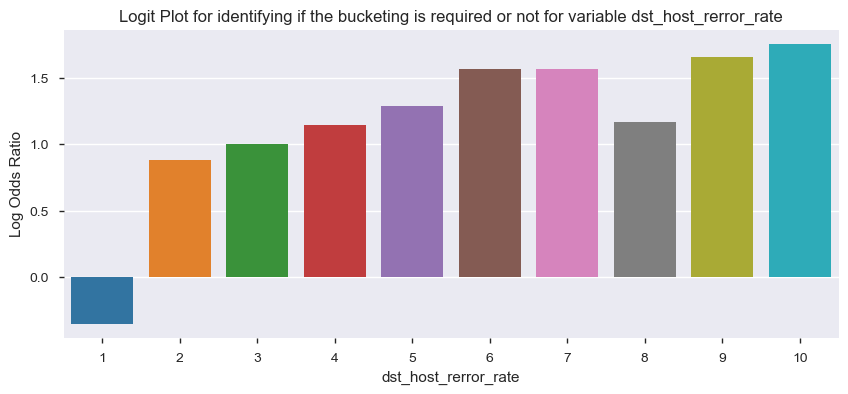

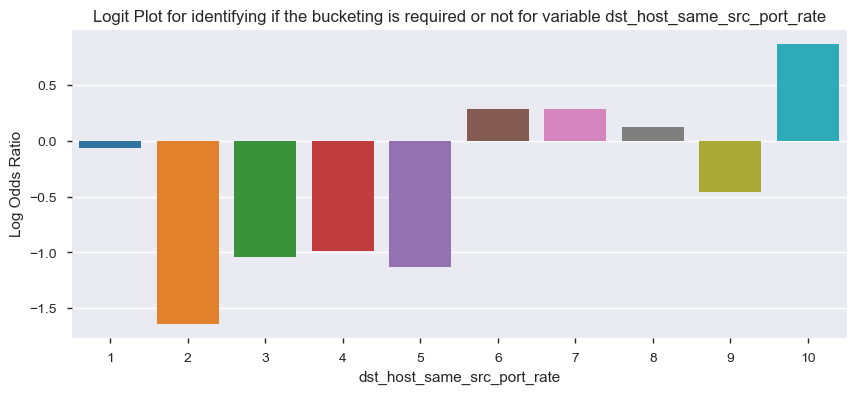

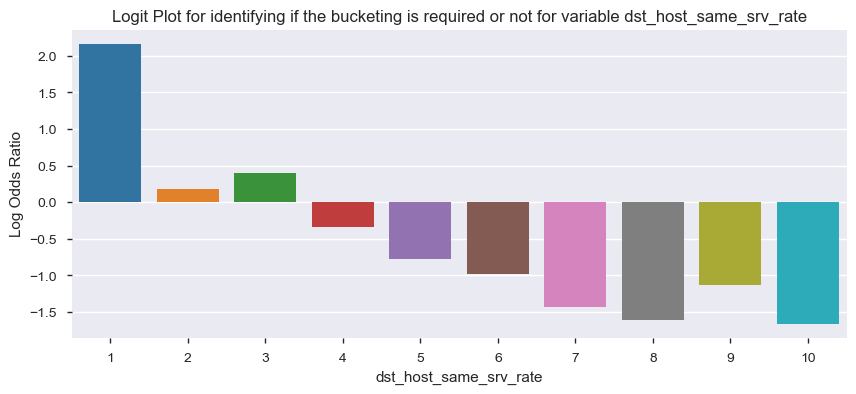

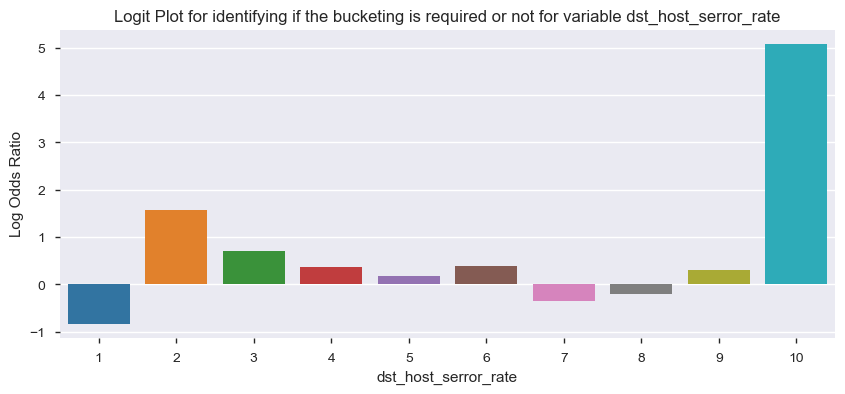

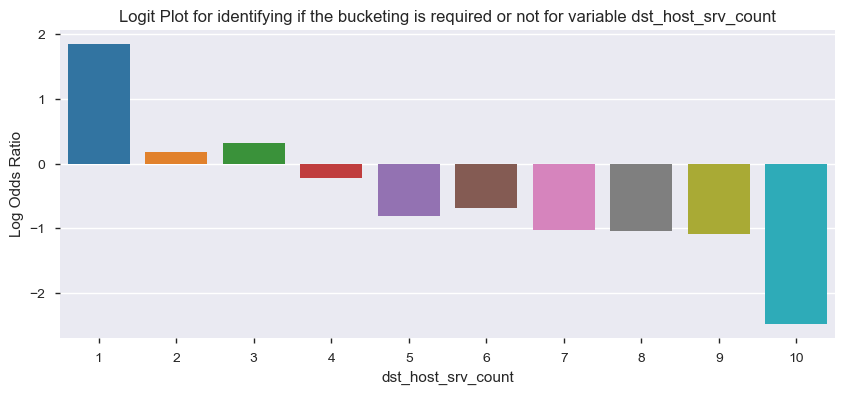

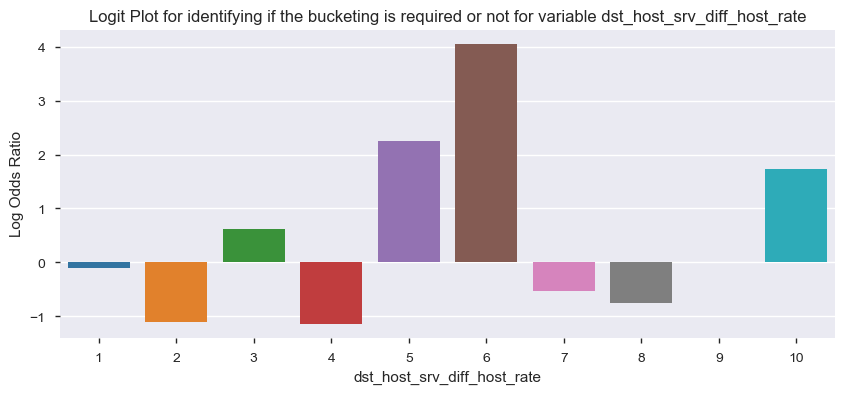

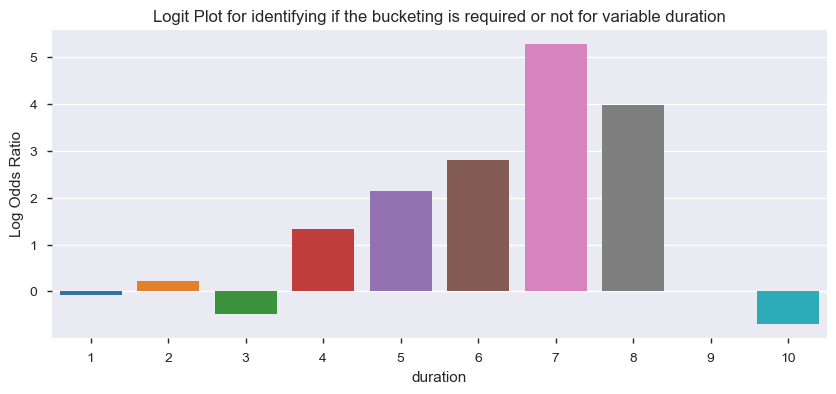

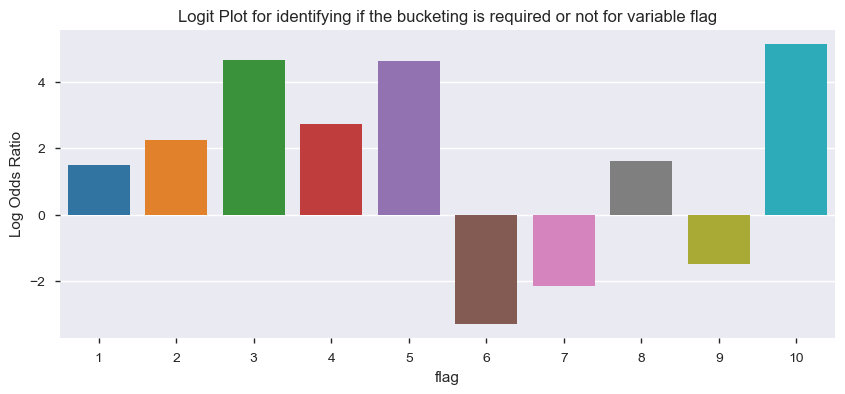

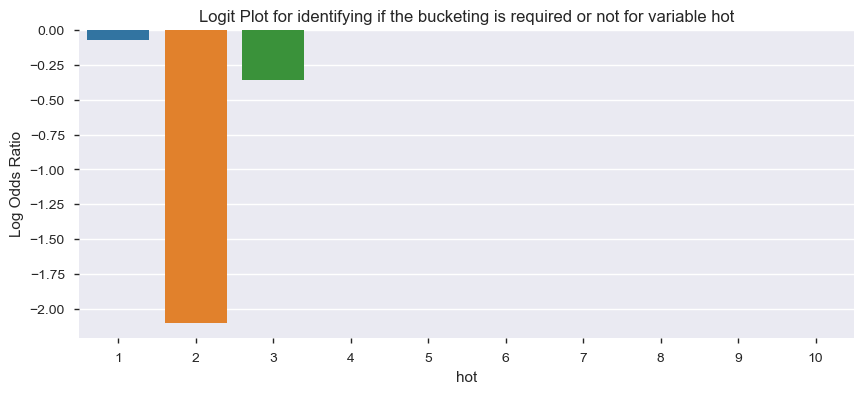

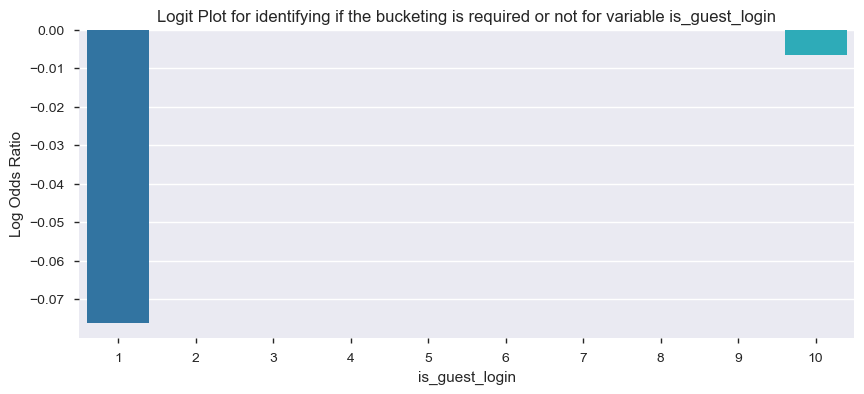

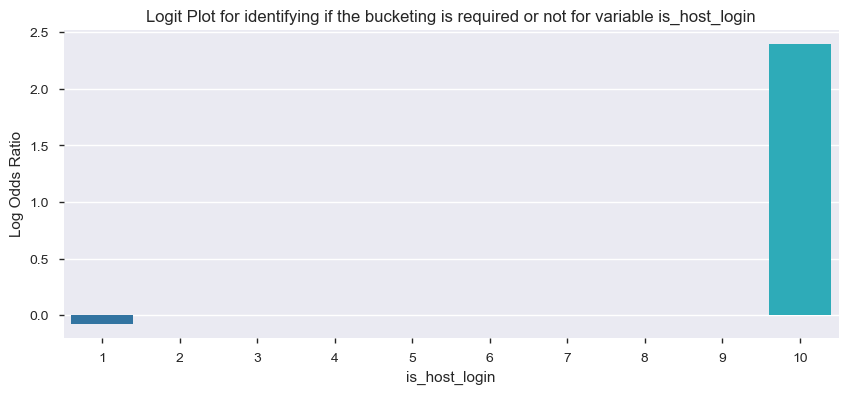

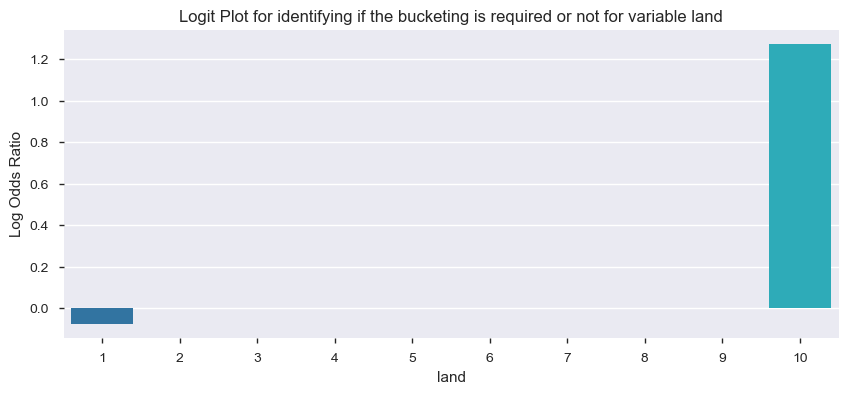

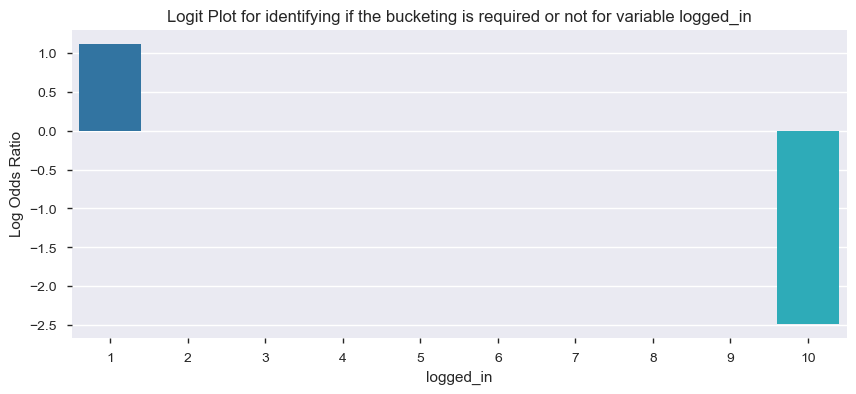

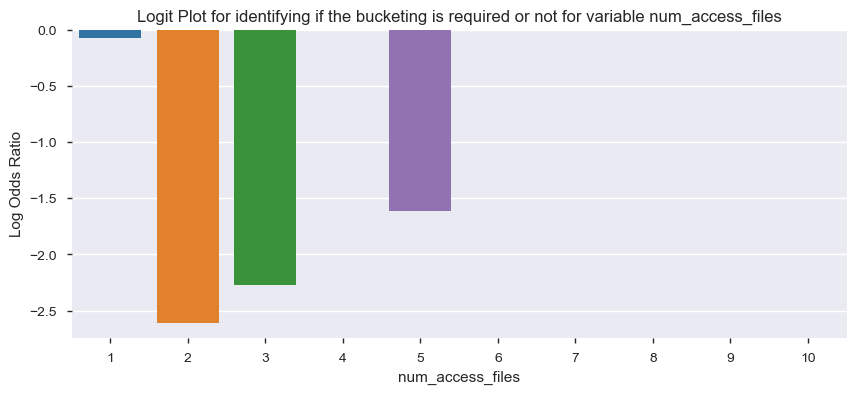

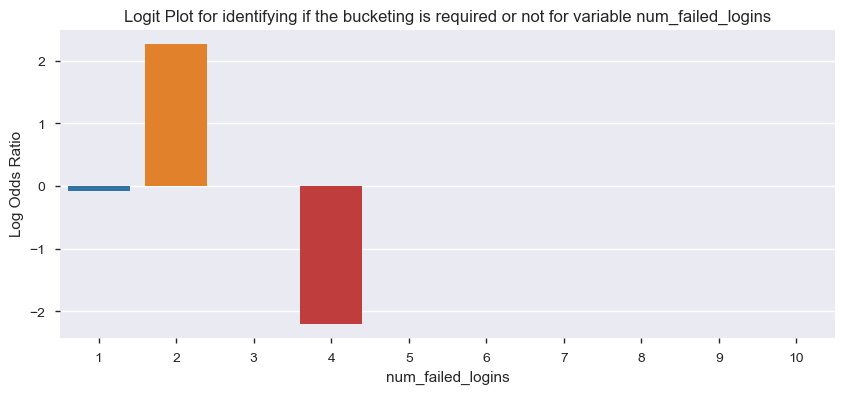

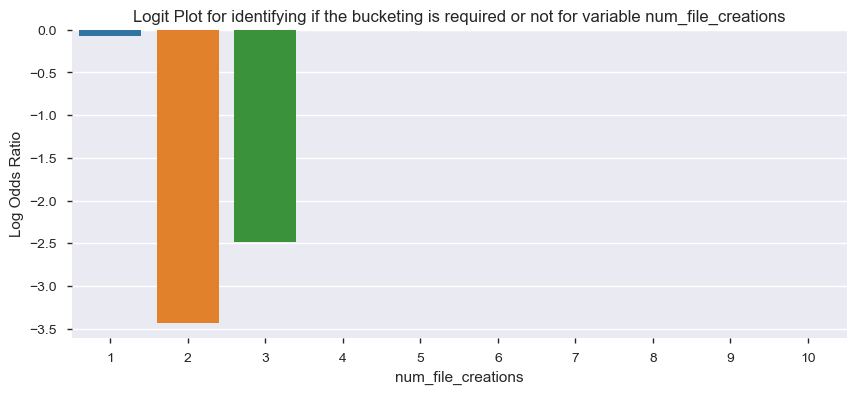

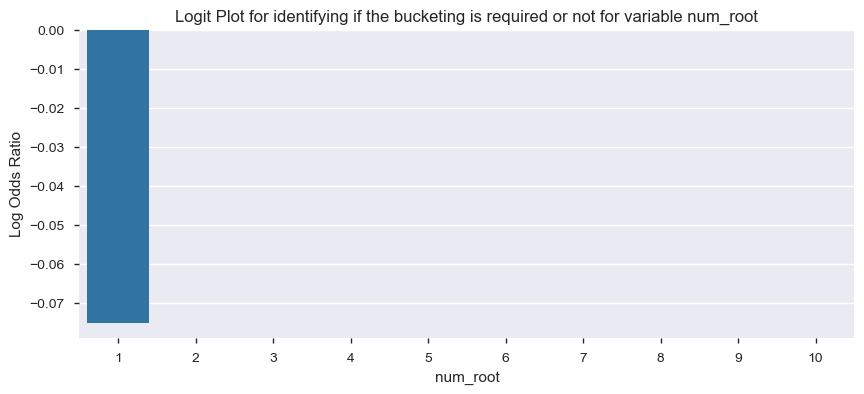

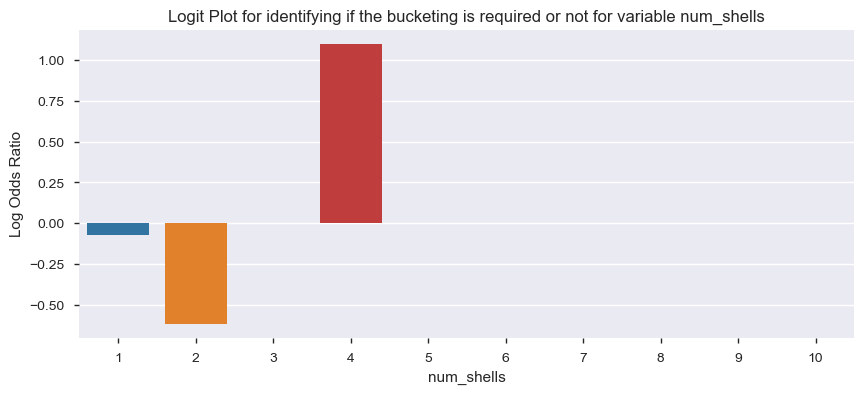

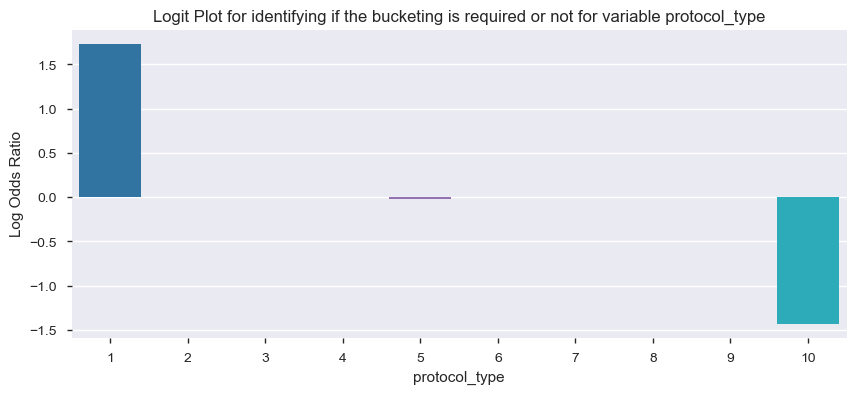

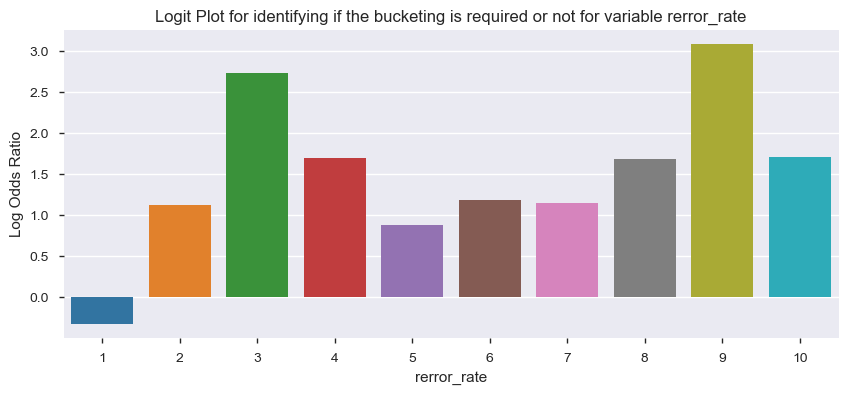

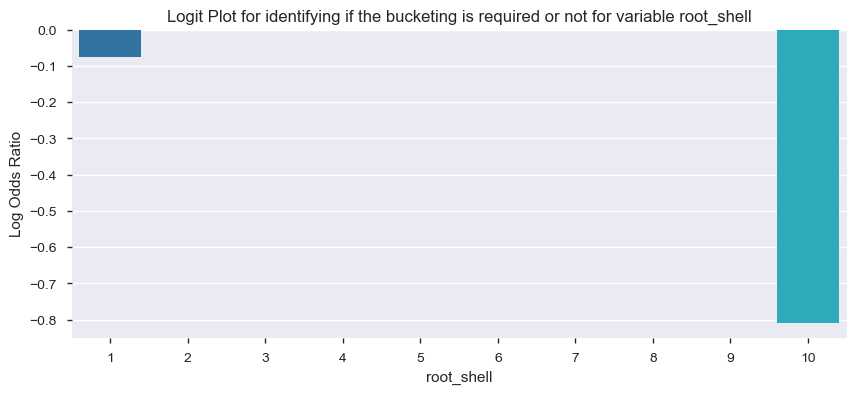

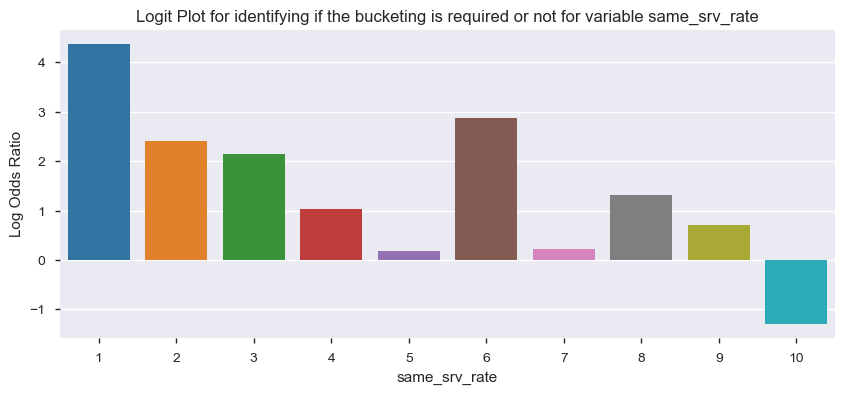

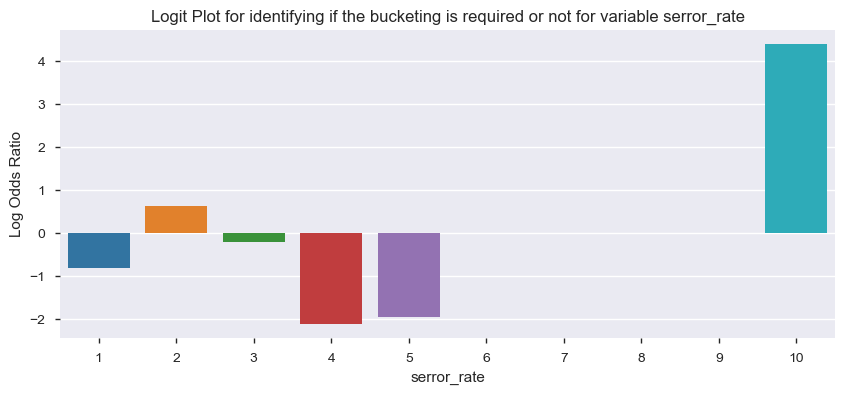

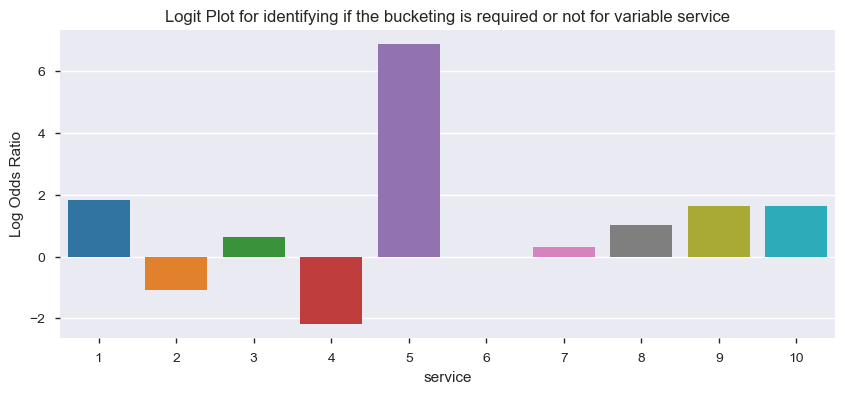

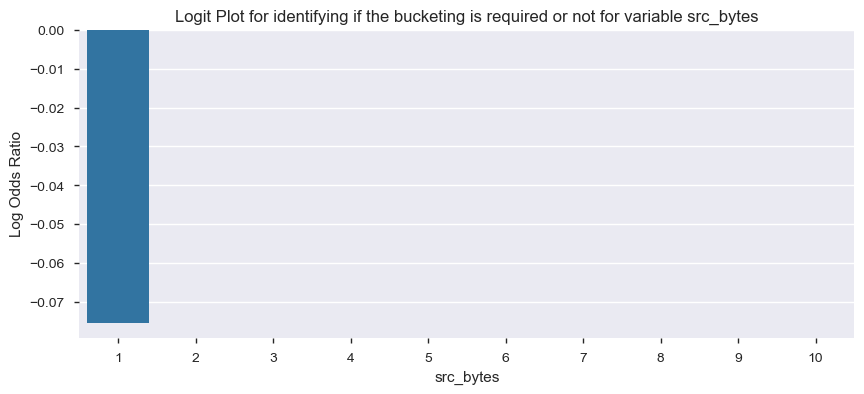

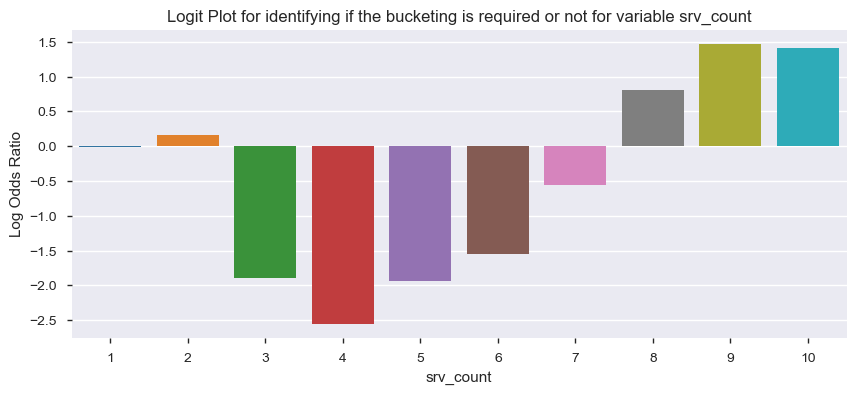

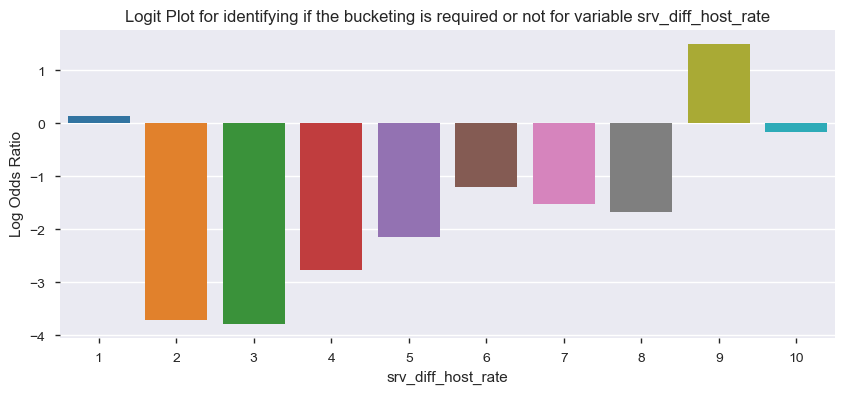

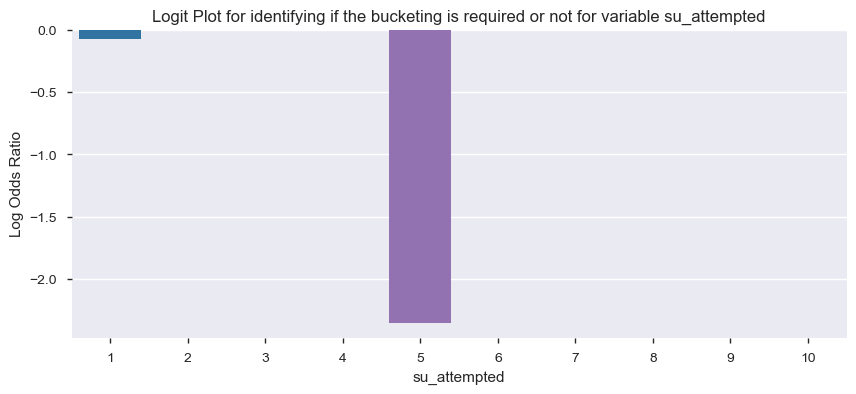

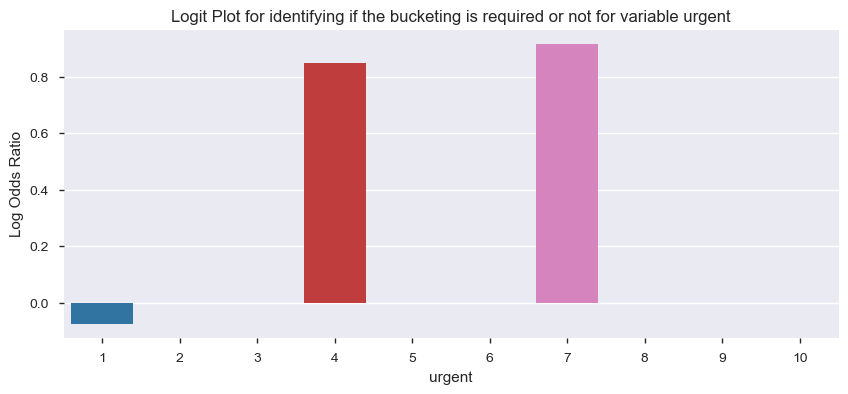

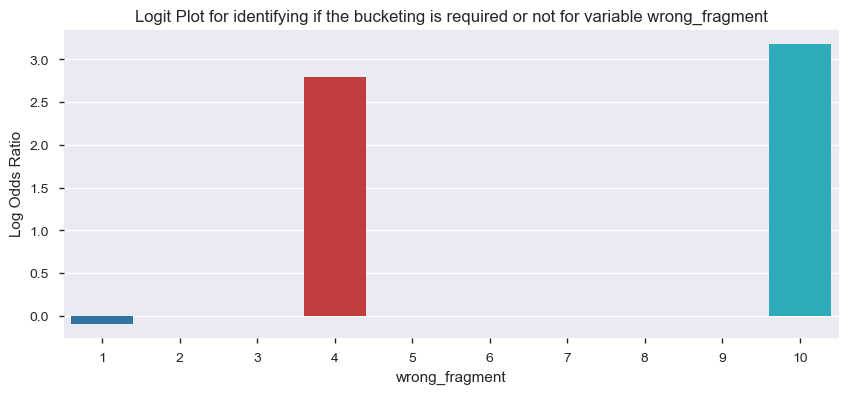

In [58]:
bp = PdfPages('WOE Plots.pdf')

for num_variable in data_final.columns.difference(['target']):
    binned = pd.cut(data_final[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = data_final.groupby(binned)['target'].sum() / (data_final.groupby(binned)['target'].count()-data_final.groupby(binned)['target'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [59]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [60]:
for col in data_final.columns:
    if col == 'target': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(data_final, col, 'target')
       # print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: duration
IV score: 0.14


WoE and IV for column: protocol_type
IV score: 0.36


WoE and IV for column: service
IV score: 3.86


WoE and IV for column: flag
IV score: 3.82


WoE and IV for column: src_bytes
IV score: 3.74


WoE and IV for column: dst_bytes
IV score: 2.15


WoE and IV for column: land
IV score: 0.00


WoE and IV for column: wrong_fragment
IV score: 0.05


WoE and IV for column: urgent
IV score: 0.00


WoE and IV for column: hot
IV score: 0.09


WoE and IV for column: num_failed_logins
IV score: 0.02


WoE and IV for column: logged_in
IV score: 2.35


WoE and IV for column: root_shell
IV score: 0.00


WoE and IV for column: su_attempted
IV score: 0.00


WoE and IV for column: num_root
IV score: 0.01


WoE and IV for column: num_file_creations
IV score: 0.00


WoE and IV for column: num_shells
IV score: 0.00


WoE and IV for column: num_access_files
IV score: 0.01


WoE and IV for column: is_host_login
IV score: 0.00


WoE and IV for column: is_guest

 You can select the variables based on the information value and below criteria
 
 - IV: <0.02, Predictive Power: Useless for prediction
 - IV: 0.02 - 0.1, Predictive Power: Weak predictor
 - IV: 0.1 - 0.2, Predictive Power: Medium predictor
 - IV: 0.3 - 0.5, Predictive Power: Storng predictor
 - IV: > 0.5, Predictive Power: Suspecious predictor or too good predictor

#### VIF Variance Inflation Factor

In [61]:
X_new =  X[X.columns.difference(['land','urgent','su_attempted', 'root_shell','num_root','num_file_creations','num_shells','num_access_files','is_guest_login','is_host_login'])]
#X_new =  X
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

print(vif)

    VIF Factor                     features
0     6.986004                        count
1     2.191418                diff_srv_rate
2     1.000457                    dst_bytes
3     9.463348               dst_host_count
4     3.031284       dst_host_diff_srv_rate
5     8.770002         dst_host_rerror_rate
6     2.659583  dst_host_same_src_port_rate
7    27.470059       dst_host_same_srv_rate
8    30.226035         dst_host_serror_rate
9    17.990731           dst_host_srv_count
10    1.834999  dst_host_srv_diff_host_rate
11   54.169527                         flag
12    1.086482                          hot
13    6.379094                    logged_in
14   11.124575                protocol_type
15   11.978146                  rerror_rate
16   32.819576                same_srv_rate
17   28.437575                  serror_rate
18    6.408394                      service
19    1.001648                    src_bytes
20    4.222177                    srv_count
21    1.467984           srv_dif

### Splitting the data into train & test 

In [62]:
target = data_final[['target']]
features = X_new

In [63]:
#Splitting the data for sklearn methods
train_y, test_y, train_X, test_X = train_test_split(target,features, test_size=0.3, random_state=123)

In [240]:
#for logistic regression using statsmodels
train, test = train_test_split(data_final, test_size=0.3, random_state=0)

### Model Building

### Logistic Regression Using Stats Models (Traiditional Approach)

In [65]:
logreg = smf.logit(formula='target~count + diff_srv_rate + dst_bytes + dst_host_count + dst_host_diff_srv_rate + dst_host_rerror_rate + dst_host_same_src_port_rate + dst_host_same_srv_rate + dst_host_serror_rate + dst_host_srv_count + dst_host_srv_diff_host_rate + flag +hot+ logged_in + protocol_type + rerror_rate + same_srv_rate + serror_rate + service + src_bytes + srv_count + srv_diff_host_rate', data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.190731
         Iterations 10


In [66]:
print(result.summary2())

                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.725     
Dependent Variable:      target              AIC:                 39703.1995
Date:                    2020-06-13 10:45    BIC:                 39922.8903
No. Observations:        103961              Log-Likelihood:      -19829.   
Df Model:                22                  LL-Null:             -71988.   
Df Residuals:            103938              LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          10.0000                                            
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Intercept                   -7.0245   0.2418 -29.0505 0.0000 -7.4985 -6.5506
count                        0

### Accuracy Metrics

In [67]:
train_gini = 2*metrics.roc_auc_score(train['target'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['target'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['target'], result.predict(train))
test_auc = metrics.roc_auc_score(test['target'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The Gini Index for the model built on the Train Data is :  0.9564576052971017
The Gini Index for the model built on the Test Data is :  0.9561933859739922
The AUC for the model built on the Train Data is :  0.9782288026485508
The AUC for the model built on the Test Data is :  0.9780966929869961


In [68]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's - Train

train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['target']

# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

actual      prob
7628        0  0.003558
57620       0  0.003842
31798       0  0.034103
21399       0  0.587304
63539       0  0.153353

In [69]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's - Test

test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['target']

# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

actual      prob
44677        1  0.999797
120104       1  0.999944
34392        1  0.996843
62666        0  0.039433
32776        0  0.005087

In [70]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [78]:
roc_like_df.head()

cutoff  sensitivity  specificity  accuracy     total
0  0.000000     1.000000     0.000000  0.481402  1.000000
0  0.020408     0.998781     0.338669  0.656448  1.337450
0  0.040816     0.996363     0.418926  0.696906  1.415290
0  0.061224     0.994185     0.582632  0.780754  1.576817
0  0.081633     0.989370     0.738880  0.859467  1.728250

In [79]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [80]:
roc_like_df.head()

cutoff  sensitivity  specificity  accuracy     total
0  0.000000     1.000000     0.000000  0.481402  1.000000
0  0.020408     0.998781     0.338669  0.656448  1.337450
0  0.040816     0.996363     0.418926  0.696906  1.415290
0  0.061224     0.994185     0.582632  0.780754  1.576817
0  0.081633     0.989370     0.738880  0.859467  1.728250

In [81]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

cutoff  sensitivity  specificity  accuracy     total
0  0.489796     0.901632     0.950273  0.926857  1.851905

In [75]:
#Cut-off based on highest accuracy   - some teams use this as methodology to decide the cut-off
roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

cutoff  sensitivity  specificity  accuracy     total
0  0.489796     0.901632     0.950273  0.926857  1.851905

In [76]:
#Cut-off based on highest sensitivity
roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]

cutoff  sensitivity  specificity  accuracy  total
0     0.0          1.0          0.0  0.481402    1.0

In [82]:
#Choosen Best Cut-off is 0.53 based on highest (sensitivity+specicity)

test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.489796 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.489796 else 0)

In [83]:
train_predict.head()

actual      prob  predicted
7628        0  0.003558          0
57620       0  0.003842          0
31798       0  0.034103          0
21399       0  0.587304          1
63539       0  0.153353          0

In [84]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.9268571868296765
The overall accuracy score for the Test Data  is :  0.9275742885357752


In [85]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     53914
           1       0.94      0.90      0.92     50047

    accuracy                           0.93    103961
   macro avg       0.93      0.93      0.93    103961
weighted avg       0.93      0.93      0.93    103961



In [86]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     23140
           1       0.94      0.90      0.92     21416

    accuracy                           0.93     44556
   macro avg       0.93      0.93      0.93     44556
weighted avg       0.93      0.93      0.93     44556



In [87]:
### Decile Analysis

#Decile analysis
#Top-two deciles - High risk customers - will reject applications
#3rd,4th, 5th deciesl - medium risk customers - will accept application with proper scrutin
#6th decile onwards - low risk customers - accept the applications


#Decile analysis for validation of models - Business validation

In [88]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)

train_predict.head()

actual      prob  predicted  Deciles
7628        0  0.003558          0        0
57620       0  0.003842          0        0
31798       0  0.034103          0        2
21399       0  0.587304          1        5
63539       0  0.153353          0        4

In [89]:
test_predict['Deciles']=pd.qcut(test_predict['prob'],10, labels=False)

test_predict.head()

actual      prob  predicted  Deciles
44677        1  0.999797          1        9
120104       1  0.999944          1        9
34392        1  0.996843          1        7
62666        0  0.039433          0        2
32776        0  0.005087          0        0

In [90]:
# Decile Analysis for train data

no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [91]:
Decile_analysis_train = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_train

prob      prob  actual  actual  actual
Deciles                                            
9        1.000000  0.999113   10378      18   10396
8        0.999113  0.997037   10373      23   10396
7        0.997037  0.985438   10365      31   10396
6        0.985435  0.853785    9580     816   10396
5        0.853766  0.322636    5778    4618   10396
4        0.322632  0.093793    2761    7635   10396
3        0.093792  0.061029     523    9873   10396
2        0.061025  0.030396     170   10226   10396
1        0.030392  0.007020     114   10282   10396
0        0.007020  0.000211       5   10392   10397

In [92]:
# Decile Analysis for test data

no_1s = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

Decile_analysis_test = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_test

prob      prob  actual  actual  actual
Deciles                                            
9        1.000000  0.999126    4448       8    4456
8        0.999126  0.996986    4444      11    4455
7        0.996986  0.985738    4441      15    4456
6        0.985727  0.851906    4080     375    4455
5        0.851886  0.321747    2457    1999    4456
4        0.321625  0.096051    1214    3241    4455
3        0.096045  0.060990     219    4237    4456
2        0.060990  0.029472      64    4391    4455
1        0.029470  0.006978      44    4412    4456
0        0.006969  0.000417       5    4451    4456

### Logistic Regression using sklearn

In [93]:
#Build the model
model = LogisticRegression()
model_Reg = model.fit(train_X, train_y)

In [94]:
train_X['pred_prob'] = pd.DataFrame(model_Reg.predict_proba(train_X), index=train_X.index)[1]

In [95]:
test_X['pred_prob'] = pd.DataFrame(model_Reg.predict_proba(test_X),index=test_X.index)[1]

In [96]:
train = pd.concat([train_X, train_y], axis=1)

In [97]:
test = pd.concat([test_X, test_y], axis=1)

In [98]:
train['pred'] = np.where(train.pred_prob>0.489796, 1,0)
test['pred'] = np.where(test.pred_prob>0.489796, 1,0)

In [99]:
train.head()

count  diff_srv_rate  dst_bytes  dst_host_count  \
123980      1            0.0        138              88   
18402       1            0.0        333             108   
35194      29            0.0        315             255   
113561      7            0.0        462              77   
17561       1            0.0          0              64   

        dst_host_diff_srv_rate  dst_host_rerror_rate  \
123980                    0.07                   0.0   
18402                     0.04                   0.0   
35194                     0.00                   0.0   
113561                    0.00                   0.0   
17561                     0.03                   0.0   

        dst_host_same_src_port_rate  dst_host_same_srv_rate  \
123980                         0.01                    0.02   
18402                          0.01                    0.86   
35194                          0.00                    1.00   
113561                         0.01                    1.00   
17561                          0.98                    0.98   

        dst_host_serror_rate  dst_host_srv_count  ...  rerror_rate  \
123980                   0.0                  13  ...          0.0   
18402                    0.0                 128  ...          0.0   
35194                    0.0                 255  ...          0.0   
113561                   0.0                 255  ...          0.0   
17561                    0.0                  90  ...          0.0   

        same_srv_rate  serror_rate  service  src_bytes  srv_count  \
123980            1.0          0.0       18          7          1   
18402             1.0          0.0       54       1325          2   
35194             1.0          0.0       24        198         29   
113561            1.0          0.0       24        215          8   
17561             1.0          0.0       14         30          1   

        srv_diff_host_rate  pred_prob  target  pred  
123980                0.00   0.497356       0     1  
18402                 1.00   0.239330       0     0  
35194                 0.00   0.101467       0     0  
113561                0.25   0.061191       0     0  
17561                 0.00   0.281197       0     0  

[5 rows x 25 columns]

In [100]:
test.head()

count  diff_srv_rate  dst_bytes  dst_host_count  \
87015       1           0.00       1800             255   
101991    237           0.06          0             255   
22048     111           0.06          0             255   
1371        1           0.00          0             146   
34176     120           0.07          0             255   

        dst_host_diff_srv_rate  dst_host_rerror_rate  \
87015                     0.01                   0.0   
101991                    0.07                   0.0   
22048                     0.07                   0.0   
1371                      0.01                   0.0   
34176                     0.06                   0.0   

        dst_host_same_src_port_rate  dst_host_same_srv_rate  \
87015                          0.00                    0.97   
101991                         0.00                    0.02   
22048                          0.00                    0.01   
1371                           0.01                    0.05   
34176                          0.00                    0.06   

        dst_host_serror_rate  dst_host_srv_count  ...  rerror_rate  \
87015                    0.0                 247  ...          0.0   
101991                   1.0                   5  ...          0.0   
22048                    1.0                   2  ...          0.0   
1371                     0.0                  12  ...          0.0   
34176                    1.0                  15  ...          0.0   

        same_srv_rate  serror_rate  service  src_bytes  srv_count  \
87015            1.00         0.00       24        252          1   
101991           0.02         1.00       36          0          5   
22048            0.03         1.00       49          0          3   
1371             1.00         0.00       18          8          1   
34176            0.06         0.99       49          0          7   

        srv_diff_host_rate  pred_prob  target  pred  
87015                  0.0   0.094461       0     0  
101991                 0.0   0.998908       1     1  
22048                  0.0   0.972443       1     1  
1371                   0.0   0.532406       0     1  
34176                  0.0   0.972752       1     1  

[5 rows x 25 columns]

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train.target, train.pred)
print(confusion_matrix)

[[48127  5687]
 [ 9246 40901]]


In [102]:
print(metrics.classification_report(train.target, train.pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87     53814
           1       0.88      0.82      0.85     50147

    accuracy                           0.86    103961
   macro avg       0.86      0.85      0.86    103961
weighted avg       0.86      0.86      0.86    103961



In [103]:
print(metrics.classification_report(test.target, test.pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86     23240
           1       0.87      0.81      0.84     21316

    accuracy                           0.85     44556
   macro avg       0.86      0.85      0.85     44556
weighted avg       0.86      0.85      0.85     44556



#### Performing logistic Regression using K-Fold validation manually

In [104]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(modelCV, train_X, train_y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.856


In [105]:
results

array([0.85207271, 0.85128896, 0.85879184, 0.85359754, 0.86350519,
       0.85763755, 0.85542516, 0.85302039, 0.85657945, 0.85754136])

### K-Nearest Neighbours`

In [109]:
#Standardization of data
sc = StandardScaler()

In [110]:
std_data_train = pd.DataFrame(sc.fit_transform(train_X), columns=train_X.columns, index = train_X.index )

In [111]:
std_data_test = pd.DataFrame(sc.transform(test_X), columns=test_X.columns, index = test_X.index )

In [112]:
#Using GridsearchCV with standrardized data
param_grid = {'n_neighbors':[3,4,5,6,7],
              'weights': ['uniform', 'distance']}
model = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
model_KNN = model.fit(std_data_train, train_y)

In [114]:
model_KNN.best_score_

0.9905349049867097

In [115]:
model_KNN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [116]:
model_KNN.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [117]:
train_pred = model_KNN.predict(std_data_train)
test_pred = model_KNN.predict(std_data_test)

In [118]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53814
           1       1.00      1.00      1.00     50147

    accuracy                           1.00    103961
   macro avg       1.00      1.00      1.00    103961
weighted avg       1.00      1.00      1.00    103961



In [119]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23240
           1       0.99      0.99      0.99     21316

    accuracy                           0.99     44556
   macro avg       0.99      0.99      0.99     44556
weighted avg       0.99      0.99      0.99     44556



### Decision Tree Model

In [121]:
train_X = train_X[train_X.columns.difference(['pred_prob'])]
test_X = test_X[test_X.columns.difference(['pred_prob'])]

In [122]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [123]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])},
             pre_dispatch=

In [124]:
tree.best_score_

0.9442964188493762

In [125]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [126]:
tree.best_params_

{'max_depth': 4, 'max_features': 4}

#### Classification Report - Decision Tree

In [127]:
train_pred = tree.predict(train_X)
test_pred = tree.predict(test_X)

In [128]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     53814
           1       0.95      0.89      0.92     50147

    accuracy                           0.93    103961
   macro avg       0.93      0.92      0.93    103961
weighted avg       0.93      0.93      0.93    103961



In [129]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     23240
           1       0.95      0.89      0.92     21316

    accuracy                           0.93     44556
   macro avg       0.93      0.92      0.93     44556
weighted avg       0.93      0.93      0.93     44556



#### Building Final Decision Tree Model

In [130]:
train_X = train_X[train_X.columns.difference(['pred_prob'])]

In [131]:
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=4, max_leaf_nodes=5 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=4, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [132]:
##ROC Curve - Using Decision Tree

print(metrics.classification_report(train_y, clf_tree.predict(train_X)))
print(metrics.classification_report(test_y, clf_tree.predict(test_X)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     53814
           1       0.93      0.81      0.87     50147

    accuracy                           0.88    103961
   macro avg       0.89      0.88      0.88    103961
weighted avg       0.88      0.88      0.88    103961

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     23240
           1       0.93      0.81      0.86     21316

    accuracy                           0.88     44556
   macro avg       0.89      0.88      0.88     44556
weighted avg       0.88      0.88      0.88     44556



#### Relative Importance of Features

In [133]:
clf_tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.6576154 ,
       0.        , 0.21310414, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.12928046,
       0.        , 0.        ])

In [134]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(train_X.columns, clf_tree.feature_importances_)]

feature_map

[('count', 0.0),
 ('diff_srv_rate', 0.0),
 ('dst_bytes', 0.0),
 ('dst_host_count', 0.0),
 ('dst_host_diff_srv_rate', 0.0),
 ('dst_host_rerror_rate', 0.0),
 ('dst_host_same_src_port_rate', 0.0),
 ('dst_host_same_srv_rate', 0.0),
 ('dst_host_serror_rate', 0.0),
 ('dst_host_srv_count', 0.657615397198496),
 ('dst_host_srv_diff_host_rate', 0.0),
 ('flag', 0.2131041435042011),
 ('hot', 0.0),
 ('logged_in', 0.0),
 ('protocol_type', 0.0),
 ('rerror_rate', 0.0),
 ('same_srv_rate', 0.0),
 ('serror_rate', 0.0),
 ('service', 0.0),
 ('src_bytes', 0.1292804592973029),
 ('srv_count', 0.0),
 ('srv_diff_host_rate', 0.0)]

In [135]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance.head(30)

Feature  importance
9            dst_host_srv_count    0.657615
11                         flag    0.213104
19                    src_bytes    0.129280
12                          hot    0.000000
20                    srv_count    0.000000
18                      service    0.000000
17                  serror_rate    0.000000
16                same_srv_rate    0.000000
15                  rerror_rate    0.000000
14                protocol_type    0.000000
13                    logged_in    0.000000
0                         count    0.000000
1                 diff_srv_rate    0.000000
10  dst_host_srv_diff_host_rate    0.000000
8          dst_host_serror_rate    0.000000
7        dst_host_same_srv_rate    0.000000
6   dst_host_same_src_port_rate    0.000000
5          dst_host_rerror_rate    0.000000
4        dst_host_diff_srv_rate    0.000000
3                dst_host_count    0.000000
2                     dst_bytes    0.000000
21           srv_diff_host_rate    0.000000

### Generate Rules from Decision Trees

In [136]:
import os     
os.environ["PATH"] += os.pathsep + 'H:/Machine Learning/graphviz-2.38/release/bin'

In [137]:
# Exporting the tree output in the form opendocument
export_graphviz( clf_tree,
              out_file = "bank_tree.odt",
              feature_names = train_X.columns )

In [138]:
# Converting open document file to jpg imanage

import pydotplus as pdot
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'bank_tree.odt' )

In [139]:
chd_tree_graph.write_jpg( 'bank_tree.jpg' )

True

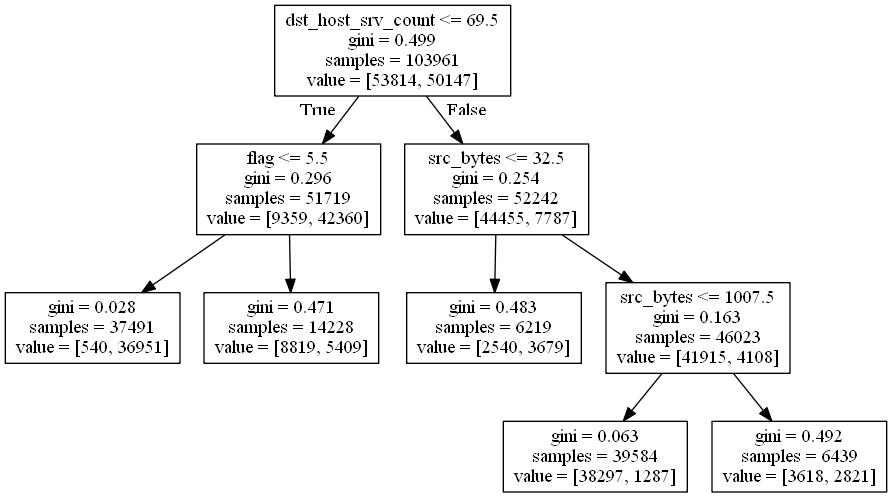

In [140]:
# Viewing the image in the notebook (display the image)
from IPython.display import Image
Image(filename='bank_tree.jpg')

### Bagging - Bootstrap Aggregating(Overfitting Issue)

In [141]:
from sklearn.ensemble import BaggingClassifier

In [142]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100]}

gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [143]:
gscv_results = gscv_bagging.fit(train_X, train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.4min finished


In [144]:
gscv_results.best_params_

{'n_estimators': 100}

In [145]:
gscv_results.best_score_

0.9949596483296621

#### Bagging Classification Report

In [146]:
##Train Data

print(metrics.classification_report(train_y,gscv_results.predict(train_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53814
           1       1.00      1.00      1.00     50147

    accuracy                           1.00    103961
   macro avg       1.00      1.00      1.00    103961
weighted avg       1.00      1.00      1.00    103961



In [147]:
## Test Data

print(metrics.classification_report(test_y,gscv_results.predict(test_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23240
           1       1.00      0.99      1.00     21316

    accuracy                           1.00     44556
   macro avg       1.00      1.00      1.00     44556
weighted avg       1.00      1.00      1.00     44556



#### 1. Random Forest Regressor - Bagging Special Case(Overfitting Issue)

In [148]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=6, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

#### Feature Importance from Random Forest Model

In [149]:
radm_clf.feature_importances_

indices = np.argsort(radm_clf.feature_importances_)[::-1]

In [150]:
import seaborn as sn

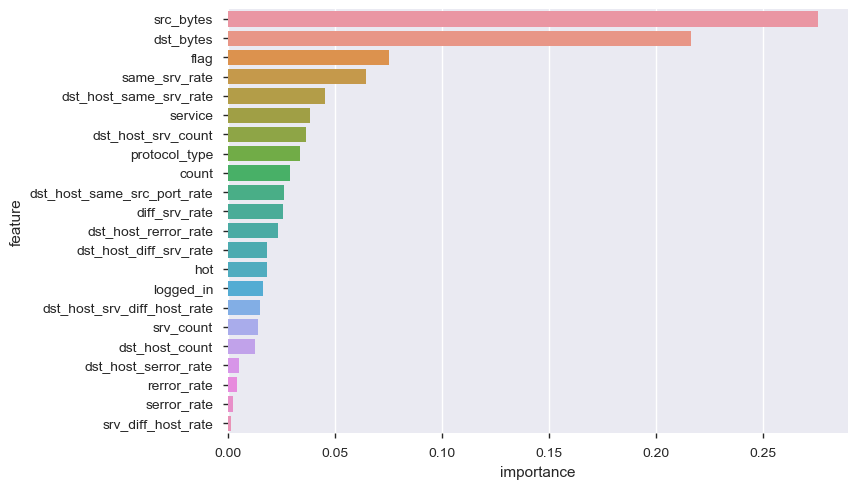

In [151]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

#### Using Tuning Parameters to validate the Model

In [152]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100],
                'max_features': [5,6,7,8,9,10,11,12]}
gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [153]:
gscv_results = gscv_Rf.fit(train_X, train_y)
gscv_results.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 14.9min finished


0.9956137397677975

In [154]:
gscv_results.best_params_

{'max_features': 11, 'n_estimators': 100}

In [155]:
##Train Data

print(metrics.classification_report(train_y,gscv_results.predict(train_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53814
           1       1.00      1.00      1.00     50147

    accuracy                           1.00    103961
   macro avg       1.00      1.00      1.00    103961
weighted avg       1.00      1.00      1.00    103961



In [156]:
##Test Data

print(metrics.classification_report(test_y,gscv_results.predict(test_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23240
           1       1.00      1.00      1.00     21316

    accuracy                           1.00     44556
   macro avg       1.00      1.00      1.00     44556
weighted avg       1.00      1.00      1.00     44556



In [157]:
##ROC Curve

print(metrics.roc_auc_score(train_y,pd.DataFrame(gscv_results.predict_proba(train_X))[1]))

print(metrics.roc_auc_score(test_y,pd.DataFrame(gscv_results.predict_proba(test_X))[1]))

0.9999993757899106
0.9997420071272409


### Boosting - Underfitting Issue

#### 1. Adaptive Boosting

In [158]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [159]:
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [160]:
gscv_ada.fit(train_X, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 31.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [100, 200, 400, 600, 800]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [161]:
gscv_ada.best_params_

{'learning_rate': 1, 'n_estimators': 800}

In [162]:
gscv_ada.best_score_

0.9880339742788161

##### Adaptive Boosting Classification Report

In [163]:
#train Data

print(metrics.classification_report(train_y,gscv_ada.predict(train_X)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     53814
           1       0.99      0.99      0.99     50147

    accuracy                           0.99    103961
   macro avg       0.99      0.99      0.99    103961
weighted avg       0.99      0.99      0.99    103961



In [164]:
#Test Data

print(metrics.classification_report(test_y,gscv_ada.predict(test_X)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23240
           1       0.99      0.99      0.99     21316

    accuracy                           0.99     44556
   macro avg       0.99      0.99      0.99     44556
weighted avg       0.99      0.99      0.99     44556



In [165]:
adap_boost =AdaBoostClassifier(learning_rate = 1, n_estimators=800)
adap_boost.fit(train_X, train_y )

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=800, random_state=None)

In [166]:
#train Data

print(metrics.classification_report(train_y,adap_boost.predict(train_X)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     53814
           1       0.99      0.99      0.99     50147

    accuracy                           0.99    103961
   macro avg       0.99      0.99      0.99    103961
weighted avg       0.99      0.99      0.99    103961



In [167]:
#Test Data

print(metrics.classification_report(test_y,adap_boost.predict(test_X)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23240
           1       0.99      0.99      0.99     21316

    accuracy                           0.99     44556
   macro avg       0.99      0.99      0.99     44556
weighted avg       0.99      0.99      0.99     44556



In [168]:
##ROC Curve

print(metrics.roc_auc_score(train_y,pd.DataFrame(adap_boost.predict_proba(train_X))[1]))

print(metrics.roc_auc_score(test_y,pd.DataFrame(adap_boost.predict_proba(test_X))[1]))

0.9992600179303078
0.9989758678845883


#### 2. Gradient Boosting Classification Report

In [169]:
gscv_gbm = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_gbm.fit(train_X, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 57.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [170]:
gscv_gbm.best_params_

{'learning_rate': 0.1, 'n_estimators': 800}

In [171]:
clf_gbm = gscv_gbm.best_estimator_

gscv_gbm.best_score_

0.9949307913544502

In [172]:
gbm=GradientBoostingClassifier(learning_rate = 0.1, n_estimators=800)
gbm.fit(train_X, train_y )

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=800,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [173]:
#train Data

print(metrics.classification_report(train_y,gbm.predict(train_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53814
           1       1.00      1.00      1.00     50147

    accuracy                           1.00    103961
   macro avg       1.00      1.00      1.00    103961
weighted avg       1.00      1.00      1.00    103961



In [174]:
#Test Data

print(metrics.classification_report(test_y,gbm.predict(test_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23240
           1       1.00      0.99      1.00     21316

    accuracy                           1.00     44556
   macro avg       1.00      1.00      1.00     44556
weighted avg       1.00      1.00      1.00     44556



In [175]:
##ROC Curve

print(metrics.roc_auc_score(train_y,pd.DataFrame(gbm.predict_proba(train_X))[1]))

print(metrics.roc_auc_score(test_y,pd.DataFrame(gbm.predict_proba(test_X))[1]))

0.9999504578403693
0.9998261973987685


#### 3. XGBoost

In [176]:
from xgboost import XGBClassifier

In [177]:
xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=1000,
                               max_depth=5,
                               min_child_weight=1,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=1)

In [178]:
xgb_estimator.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpa=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method=None, validate_parameters=False, verbose=1,
              verbosity=None)

In [179]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_X)))

print(metrics.classification_report(test_y, xgb_estimator.predict(test_X)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     53814
           1       1.00      0.99      0.99     50147

    accuracy                           0.99    103961
   macro avg       0.99      0.99      0.99    103961
weighted avg       0.99      0.99      0.99    103961

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23240
           1       0.99      0.99      0.99     21316

    accuracy                           0.99     44556
   macro avg       0.99      0.99      0.99     44556
weighted avg       0.99      0.99      0.99     44556



In [180]:
print(metrics.roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X))[1]))

print(metrics.roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict_proba(test_X))[1]))

0.9997721612792949
0.9997088338610318


##### Feature Importance - XGBoost

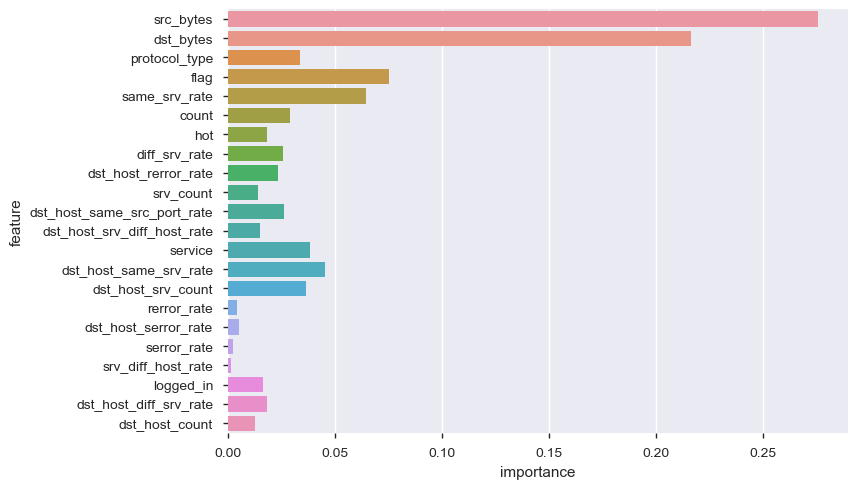

In [181]:
indices_xgb = np.argsort(xgb_estimator.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices_xgb[f]],
                         radm_clf.feature_importances_[indices_xgb[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [182]:
# summarize the selection of the attributes
import itertools
feature_map_xgb = [(i, v) for i, v in itertools.zip_longest(train_X.columns, xgb_estimator.feature_importances_)]

In [183]:
Feature_importance_xgb = pd.DataFrame(feature_map_xgb, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance.head(30)

Feature  importance
9            dst_host_srv_count    0.657615
11                         flag    0.213104
19                    src_bytes    0.129280
1                 diff_srv_rate    0.000000
2                     dst_bytes    0.000000
3                dst_host_count    0.000000
4        dst_host_diff_srv_rate    0.000000
5          dst_host_rerror_rate    0.000000
6   dst_host_same_src_port_rate    0.000000
7        dst_host_same_srv_rate    0.000000
8          dst_host_serror_rate    0.000000
10  dst_host_srv_diff_host_rate    0.000000
0                         count    0.000000
13                    logged_in    0.000000
14                protocol_type    0.000000
15                  rerror_rate    0.000000
16                same_srv_rate    0.000000
17                  serror_rate    0.000000
18                      service    0.000000
20                    srv_count    0.000000
12                          hot    0.000000
21           srv_diff_host_rate    0.000000

#### Naive Byes Model

In [184]:
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [185]:
metrics.confusion_matrix( test_y,nb_clf.predict( test_X) )

array([[23129,   111],
       [21286,    30]], dtype=int64)

In [186]:
metrics.accuracy_score( test_y, nb_clf.predict( test_X ) )

0.5197728700960589

In [187]:
print(metrics.classification_report(train_y, nb_clf.predict(train_X)))

print(metrics.classification_report(test_y, nb_clf.predict(test_X)))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68     53814
           1       0.21      0.00      0.00     50147

    accuracy                           0.52    103961
   macro avg       0.36      0.50      0.34    103961
weighted avg       0.37      0.52      0.35    103961

              precision    recall  f1-score   support

           0       0.52      1.00      0.68     23240
           1       0.21      0.00      0.00     21316

    accuracy                           0.52     44556
   macro avg       0.37      0.50      0.34     44556
weighted avg       0.37      0.52      0.36     44556



### Accuracy Metrics Interpretation

In [234]:
models = {
    'Logistic Regression': model_Reg,
    #'KNN Classification': model_KNN,
    'Decision Tree Classifier': clf_tree,
    'Random Forest':radm_clf,
    'Bagging': gscv_bagging,
    'Adaptive Boosting': gscv_ada,
    'Gradient Boosting':gscv_gbm,
    'Gaussian Naive Bayes': nb_clf,
    'XGB Boosting':xgb_estimator
}

columns = [
    'Train Accuracy',
    'Test Accuracy'
]

table = {}


for model in models.keys():
    
    train_accuracy  = metrics.roc_auc_score(train_y,pd.DataFrame(models[model].predict_proba(train_X))[1])
    test_accuracy  = metrics.roc_auc_score(test_y,pd.DataFrame(models[model].predict_proba(test_X))[1])
    table[model] = [train_accuracy,test_accuracy]

In [235]:
Accuracy_Data  = pd.DataFrame(table,index=['Train Accuracy','Test Accuracy']).T

In [237]:
Accuracy_Data.sort_values(by=['Train Accuracy'],ascending=False)

Train Accuracy  Test Accuracy
Random Forest                   0.999999       0.999776
Bagging                         0.999999       0.999602
Gradient Boosting               0.999948       0.999825
XGB Boosting                    0.999772       0.999709
Adaptive Boosting               0.999260       0.998976
Decision Tree Classifier        0.949929       0.950075
Logistic Regression             0.934548       0.931862
Gaussian Naive Bayes            0.915160       0.913001

#### <b>As per Above Observation [Random Forest,Bagging,Gradient Boosting ,XGB Boosting,Adaptive Boosting] gives highest Accuracy for Binomial Classification</b>